In [1]:
# -*- coding: utf-8 -*-

# From the Meep tutorial: plotting permittivity and fields of a straight waveguide
from __future__ import division

import meep as mp
import numpy as np
import matplotlib.pyplot as plt

cell = mp.Vector3(16,8,0)

geometry = [mp.Block(mp.Vector3(mp.inf,1,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]

sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-7,0))]

pml_layers = [mp.PML(1.0)]

resolution = 10

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

sim.run(until=200)

-----------
Initializing structure...
run 0 finished at t = 200.0 (4000 timesteps)


(-0.5, 159.5, 79.5, -0.5)

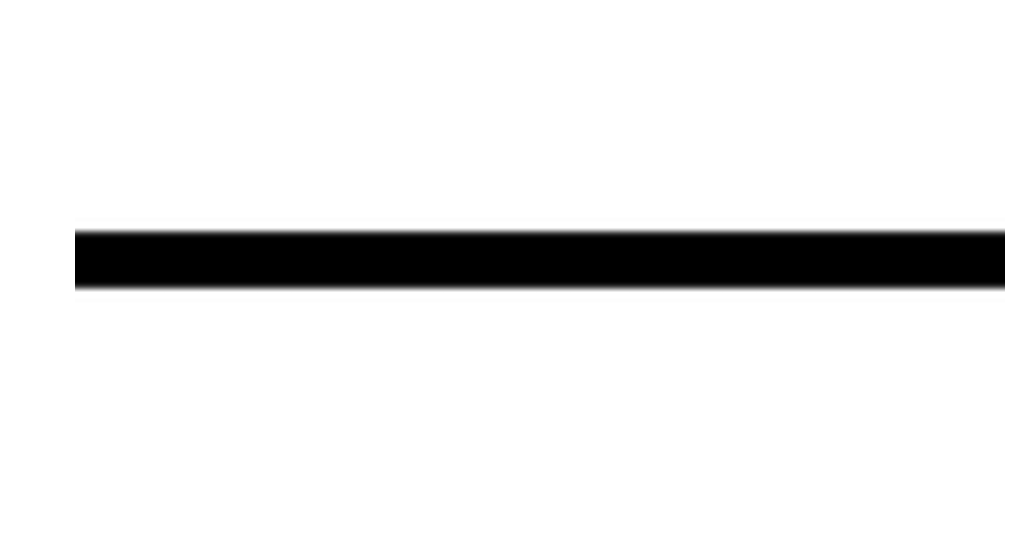

In [2]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure(dpi=200)
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')

(-0.5, 159.5, 79.5, -0.5)

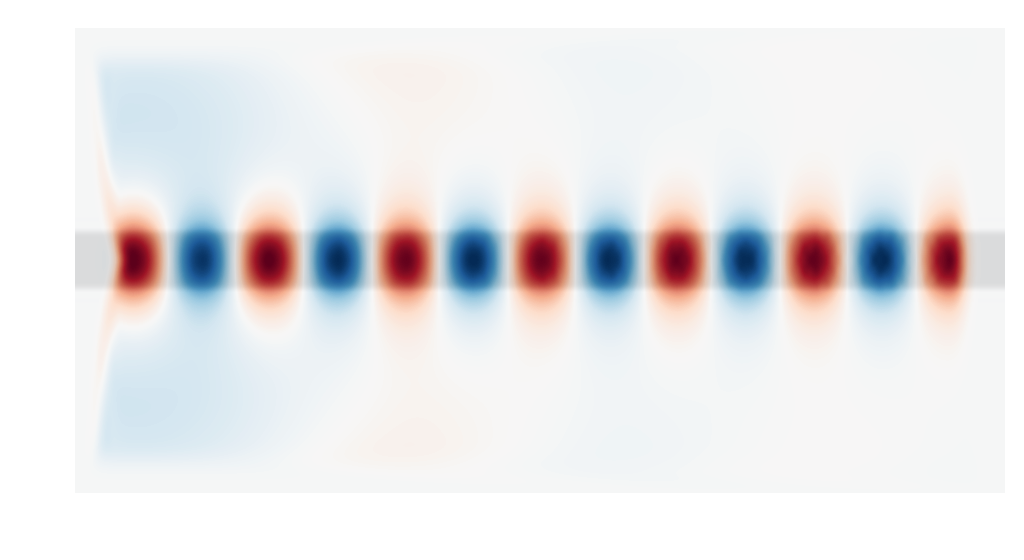

In [3]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure(dpi=200)
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')